In [82]:
import os
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
import audio2numpy as a2n
from scipy.fft import fft, ifft, fftfreq

In [4]:
wav_fname = "originalAudio//neal_trial.wav"
origin_wav = "originalAudio//y2mate.is - goku_vs._frieza_but_it_s_actually_5_minutes-a2jgfMNmzUA-192k-1696091885.wav"

In [5]:
samplerate, data = wavfile.read(wav_fname)
print(f"shape = {data.shape}")

shape = (582782,)


In [6]:
length = data.shape[0] / samplerate
print(f"length = {length}s")

length = 13.21501133786848s


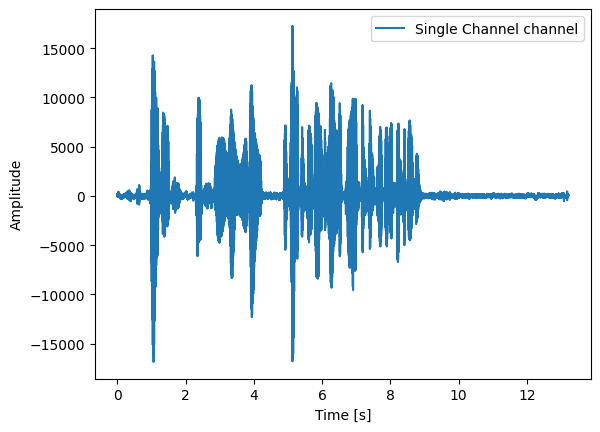

In [7]:
time = np.linspace(0., length, data.shape[0])
plt.plot(time, data[:], label="Single Channel channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_21072\332792636.py:1: WavFileWarning: Reached EOF prematurely; finished at 57654380 bytes, expected 57654388 bytes from header.
  samplerate, data = wavfile.read(origin_wav)


shape = (14413584, 2)
length = 300.283s


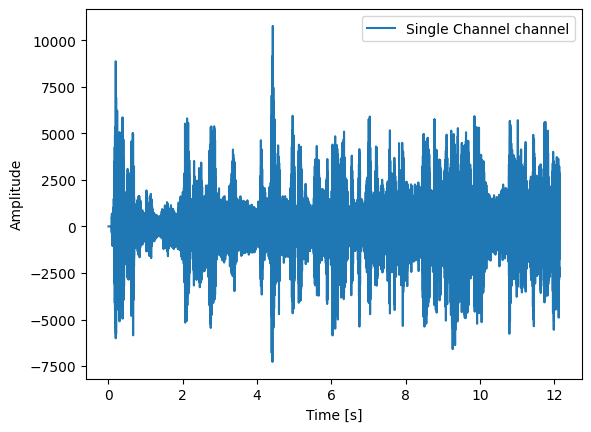

In [133]:
samplerate, data = wavfile.read(origin_wav)
print(f"shape = {data.shape}")

length = data.shape[0] / samplerate
print(f"length = {length}s")

time = np.linspace(0., length, data.shape[0])
plt.plot(time[:582782], data[:582782,0], label="Single Channel channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()


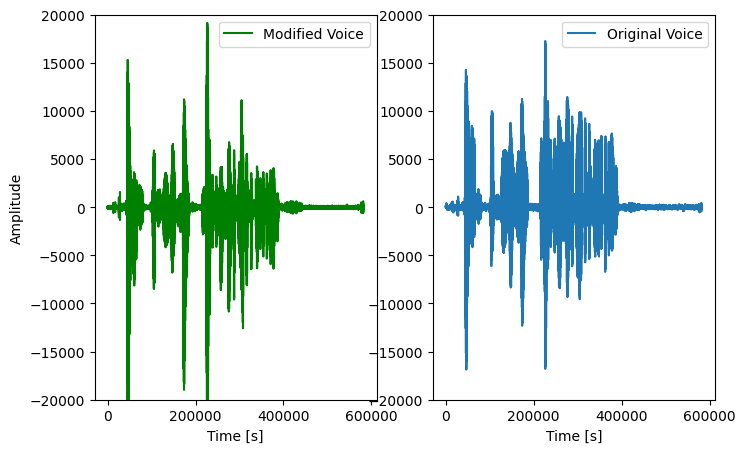

In [64]:
## MODIFYING VOICE
# filter = np.zeros(shape=(100,), dtype=np.float16)
# filter[99] = -1.0
# filter[0] = .0
filter = [0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0]
modified_data = np.convolve(data, filter)
# modified_data= modified_data - 10

time = np.linspace(0., length, data.shape[0])
length = len(time)
fig, ax = plt.subplots(1,2, figsize=(8,5), squeeze=True)
ax[0].plot(time, modified_data[:length], label="Modified Voice", color='green')
ax[0].set_xlabel("Time [s]")
ax[0].set_ylabel("Amplitude")
ax[0].legend()
ax[0].set_ylim(-20000,20000)
ax[1].plot(time, data[:length], label="Original Voice")
ax[1].set_xlabel("Time [s]")
ax[1].legend()
ax[1].set_ylim(-20000,20000)
plt.show()

In [83]:
## MODIFYING VOICE
# filter = np.zeros(shape=(100,), dtype=np.float16)
# filter[99] = -1.0
# filter[0] = .0
# filter = [0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0]
# modified_data = np.convolve(data, filter)
modified_data= fftfreq(data)

time = np.linspace(0., length, modified_data.shape[0])
length = len(time)
limit=20000
fig, ax = plt.subplots(1,2, figsize=(8,5), squeeze=True)
ax[0].plot(time[:length], modified_data[:length], label="Modified Voice", color='green')
ax[0].set_xlabel("Time [s]")
ax[0].set_ylabel("Amplitude")
ax[0].legend()
ax[0].set_ylim(-limit,limit)
# ax[1].plot(time[:length], data[:length], label="Original Voice")
# ax[1].set_xlabel("Time [s]")
# ax[1].legend()
# ax[1].set_ylim(-limit,limit)
plt.show()

ValueError: n should be an integer

In [ ]:
# modified_data= fft(data)
# # modified_data=ifft(modified_data)
# plt.plot([i for i in range(len(modified_data))],modified_data)
# plt.show()


In [ ]:
# # Number of samplepoints
# N = 50000
# # sample spacing
# T = 1.0 / 16000.0
# # x = np.linspace(0.0, N*T, N)
# # y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
# yf = fft(data)
# for i,y in enumerate(yf):
#     if y > 5000000 : pass
#     else: yf[i] = 0
# xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

# fig, ax = plt.subplots()
# ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
# plt.show()

In [10]:
output_file = "modifiedAudio//neal_trial.wav"

wavfile.write(output_file, samplerate, modified_data.astype(np.int16))

In [72]:
samplerate

44100

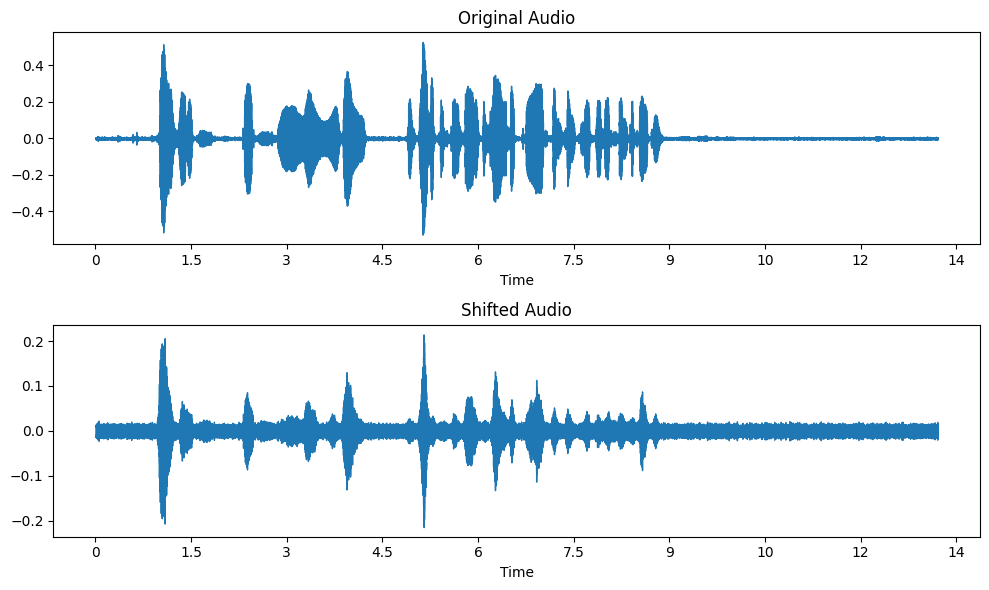

In [148]:
import numpy as np
import librosa
import librosa.display
import soundfile as sf
import noisereduce as nr

# Load an audio file
audio_file = 'originalAudio//neal_trial.wav'
y, sr = librosa.load(audio_file)

# Performing noice reduction
reduced_audio = nr.reduce_noise(y=y, sr=sr)

# Define the desired pitch shift (in semitones)
semitones = 1  # You can change this value

# Shift the pitch
y_shifted = librosa.effects.pitch_shift(y=reduced_audio, sr=sr, n_steps=semitones)

# Create a Raspy voice
def add_noise(y, noise_level=0.005):
    noise = np.random.normal(0, noise_level, len(y))
    return y + noise
y_shifted_raspy = add_noise(y_shifted)

# Save the shifted audio to a new file
output_audio_file = 'modifiedAudio//neal_trial.wav'
sf.write(output_audio_file, y_shifted_raspy, sr)

# Display the original and shifted audio for comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title("Original Audio")

plt.subplot(2, 1, 2)
librosa.display.waveshow(y_shifted_raspy, sr=sr)
plt.title("Shifted Audio")

plt.tight_layout()
plt.show()


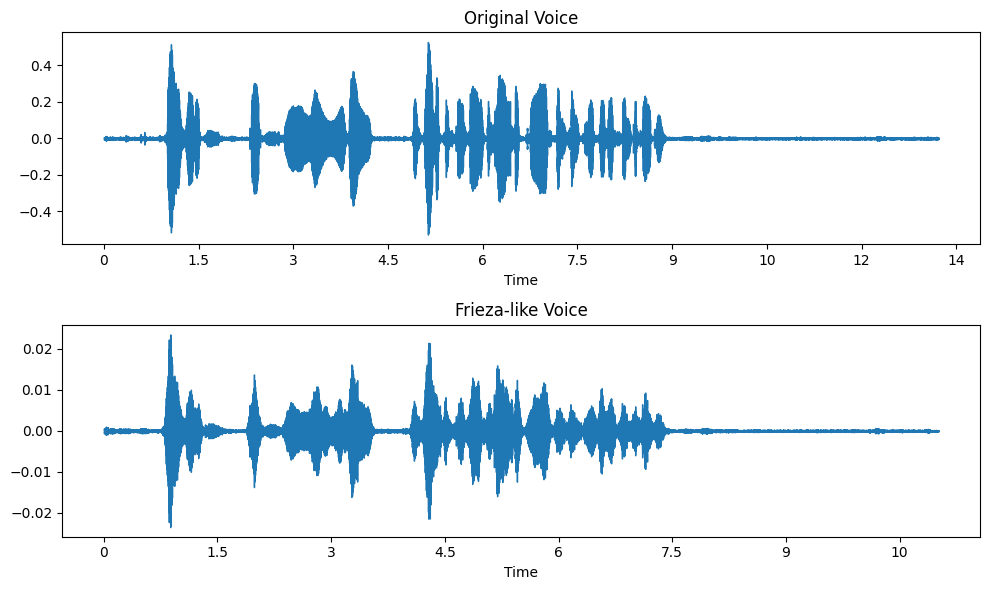

In [151]:
import librosa
import librosa.display
import soundfile as sf
import numpy as np
import scipy.signal as signal

# Load your original voice recording
original_voice_file = 'originalAudio//neal_trial.wav'
y, sr = librosa.load(original_voice_file)

# Define the desired pitch shift (in semitones) to make the voice higher
pitch_shift_semitones = 2 # You can adjust this value

# Shift the pitch of the audio
y_pitch_shifted = librosa.effects.pitch_shift(y=y, sr=sr, n_steps=pitch_shift_semitones)

# Define the desired speed (time stretch) factor
speed_factor = 1.1  # You can adjust this value

# Stretch the audio to change the speed
y_stretched = librosa.effects.time_stretch(y=y_pitch_shifted, rate=speed_factor)

# Optionally, add some distortion to achieve a robotic quality
def apply_distortion(y, saturation=0.1):
    return np.tanh(saturation * y)

y_distorted = apply_distortion(y_stretched)

# Save the processed audio to a new file
output_audio_file = 'modifiedAudio//frieza_voice.wav'
sf.write(output_audio_file, y_distorted, sr)

# Display the original and processed audio for comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title("Original Voice")

plt.subplot(2, 1, 2)
librosa.display.waveshow(y_distorted, sr=sr)
plt.title("Frieza-like Voice")

plt.tight_layout()
plt.show()
